<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Predict-personal-medical-cost/blob/main/Personal_medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --quiet

In [5]:
import opendatasets as od
dataset=od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alrafiaurnob
Your Kaggle Key: ··········


100%|██████████| 16.0k/16.0k [00:00<00:00, 8.56MB/s]

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('/content/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.shape

(1338, 7)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)
#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

In [14]:
df.shape

(1338, 7)

<Axes: >

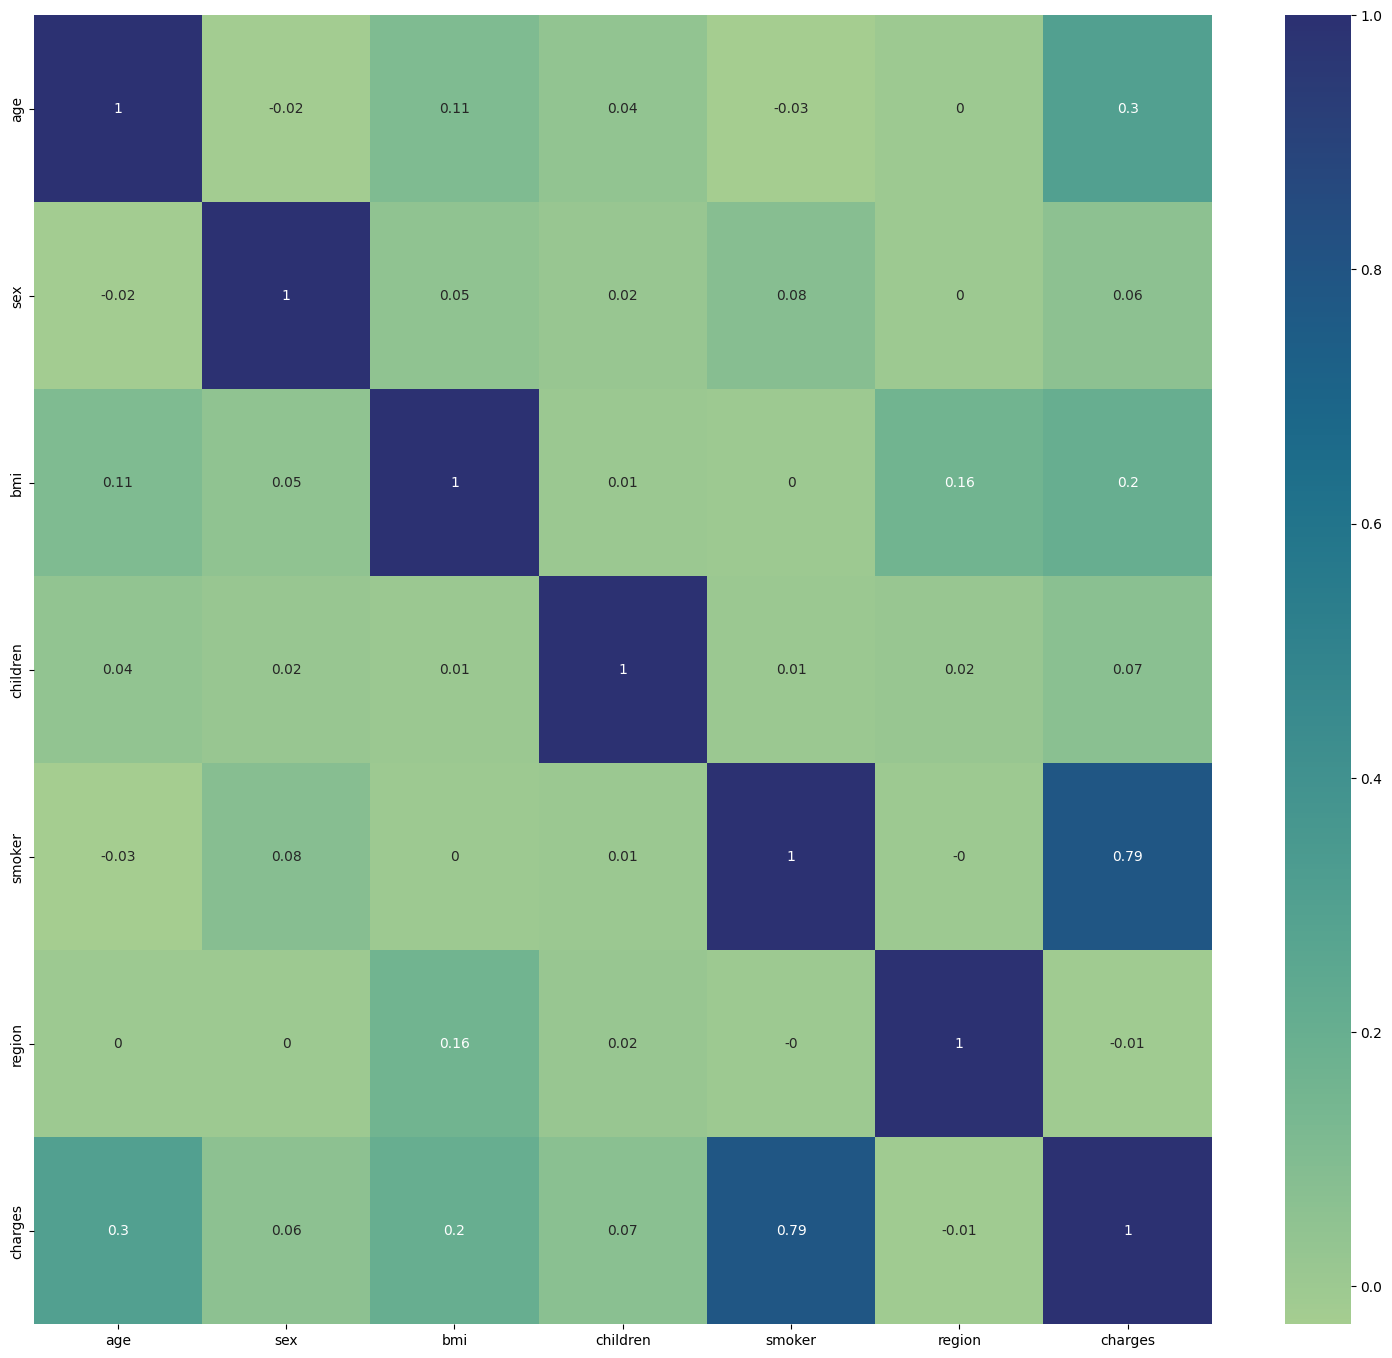

In [16]:
corr=df.corr().round(2)
plt.figure(figsize=(19,17))
sns.heatmap(corr,annot=True,cmap='crest')

In [24]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(df.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

TypeError: ignored

In [19]:
p=figure(title="Distribution of charges",tools="save",
         background_fill_color="#E8DDCB")
hist,edges=np.histogram(df.charges)
p.quad(top=hist,bottom=0,left=edges[:-1],right=edges[1:],
       fill_color="#036564",line_color="#033649")
p.xaxis.axis_label='x'
p.yaxis.axis_label='Pr(x)'
show(gridplot(p,ncols=2,plot_width=400,plot_height=400,toolbar_location=None))

TypeError: ignored